# check oof df

In [1]:
import os

import numpy as np
import pandas as pd
from pandarallel import pandarallel
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
output_dir = os.path.join("/kaggle", "working")
exp_name = "debug"
oof_df_path = os.path.join(output_dir, exp_name,"oof_df.parquet")
oof_df = pd.read_parquet(oof_df_path)

In [4]:
oof_df.columns

Index(['series_id', 'series_date_key', 'timestamp', 'date', 'time', 'step',
       'anglez', 'enmo', 'event', 'event_onset', 'event_wakeup', 'class_pred',
       'event_onset_pred', 'event_wakeup_pred', 'class_target',
       'event_onset_target', 'event_wakeup_target'],
      dtype='object')

In [5]:
oof_df.head()

,series_id,series_date_key,timestamp,date,time,step,anglez,enmo,event,event_onset,event_wakeup,class_pred,event_onset_pred,event_wakeup_pred,class_target,event_onset_target,event_wakeup_target
1081800,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:00,2018-03-13,13:15:00,0,-87.805298,0.0227,0.0,0,0,0.442921,0.624727,0.649372,0.0,0.0,0.0
1081801,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:05,2018-03-13,13:15:05,1,-87.803802,0.0224,0.0,0,0,0.423409,0.597300,0.656965,0.0,0.0,0.0
1081802,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:10,2018-03-13,13:15:10,2,-87.798897,0.0225,0.0,0,0,0.415746,0.588864,0.659249,0.0,0.0,0.0
1081803,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:15,2018-03-13,13:15:15,3,-87.804802,0.0232,0.0,0,0,0.392928,0.588110,0.659452,0.0,0.0,0.0
1081804,1087d7b0ff2e,1087d7b0ff2e_2018-03-13,2018-03-13 13:15:20,2018-03-13,13:15:20,4,-87.799896,0.0232,0.0,0,0,0.428373,0.587904,0.659508,0.0,0.0,0.0


In [6]:
# oof_df = oof_df[oof_df["series_date_key"]=="1087d7b0ff2e_2018-03-13"]
# print(len(oof_df))

In [7]:
def plot_inputs(df):
    plt.figure(figsize=(10, 5))
    plt.suptitle("inputs")
    plt.subplot(2, 1, 1)
    plt.plot(df["step"], df["anglez"])
    plt.xticks([])
    plt.subplot(2, 1, 2)
    plt.plot(df["step"], df["enmo"])
    plt.tight_layout()
    plt.show()

In [8]:
def plot_event_onset(df):
    plt.figure(figsize=(10, 5))
    plt.suptitle("event_onset")
    plt.subplot(3, 1, 1)
    plt.plot(df["step"], df["event_onset"], label="label")
    plt.xticks([])
    plt.subplot(3, 1, 2)
    plt.plot(df["step"], df["event_onset_target"], label="pred")
    plt.xticks([])
    plt.subplot(3, 1, 3)
    plt.plot(df["step"], df["event_onset_pred"], label="pred")
    plt.tight_layout()
    plt.show()

In [9]:
def plot_event_wakeup(df):
    plt.figure(figsize=(10, 5))
    plt.suptitle("event_wakeup")
    plt.subplot(2, 1, 1)
    plt.plot(df["step"], df["event_wakeup"], label="label")
    plt.xticks([])
    plt.subplot(2, 1, 2)
    plt.plot(df["step"], df["event_wakeup_pred"], label="pred")
    plt.tight_layout()
    plt.show()

In [10]:
def plot_event_sleep(df):
    plt.figure(figsize=(10, 5))
    plt.suptitle("class")
    plt.subplot(2, 1, 1)
    plt.plot(df["step"], df["class_target"], label="label")
    plt.xticks([])
    plt.subplot(2, 1, 2)
    plt.plot(df["step"], df["class_pred"], label="pred")
    plt.tight_layout()
    plt.show()

In [11]:
oof_df["series_date_key"].unique()

array(['1087d7b0ff2e_2018-03-13', '1087d7b0ff2e_2018-03-14',
       '1087d7b0ff2e_2018-03-15', '1087d7b0ff2e_2018-03-16',
       '1087d7b0ff2e_2018-03-17', '1087d7b0ff2e_2018-03-18',
       '1087d7b0ff2e_2018-03-19', '1087d7b0ff2e_2018-03-20',
       '1087d7b0ff2e_2018-03-21', '1087d7b0ff2e_2018-03-22',
       '1087d7b0ff2e_2018-03-23', '1087d7b0ff2e_2018-03-24',
       '1087d7b0ff2e_2018-03-25', '1087d7b0ff2e_2018-03-26',
       '1087d7b0ff2e_2018-03-27', '1087d7b0ff2e_2018-03-28',
       '1087d7b0ff2e_2018-03-29', '1087d7b0ff2e_2018-03-30',
       '1087d7b0ff2e_2018-03-31', '1087d7b0ff2e_2018-04-01',
       '1087d7b0ff2e_2018-04-02', '1087d7b0ff2e_2018-04-03',
       '1087d7b0ff2e_2018-04-04', '1087d7b0ff2e_2018-04-05',
       '1087d7b0ff2e_2018-04-06', '72bbd1ac3edf_2017-09-19',
       '72bbd1ac3edf_2017-09-20', '72bbd1ac3edf_2017-09-21',
       '72bbd1ac3edf_2017-09-22', '72bbd1ac3edf_2017-09-23',
       '72bbd1ac3edf_2017-09-24', '72bbd1ac3edf_2017-09-25',
       '72bbd1ac3edf_201

['1087d7b0ff2e_2018-04-02']
1087d7b0ff2e_2018-04-02


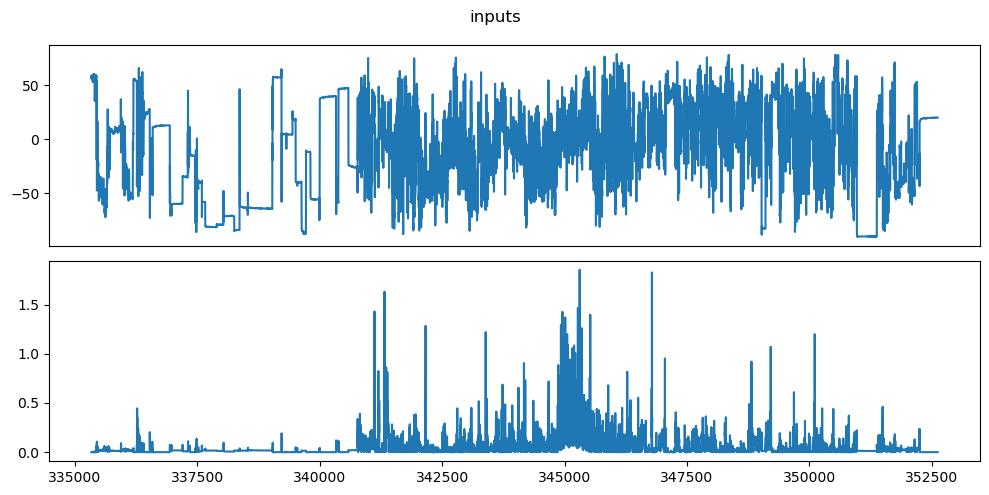

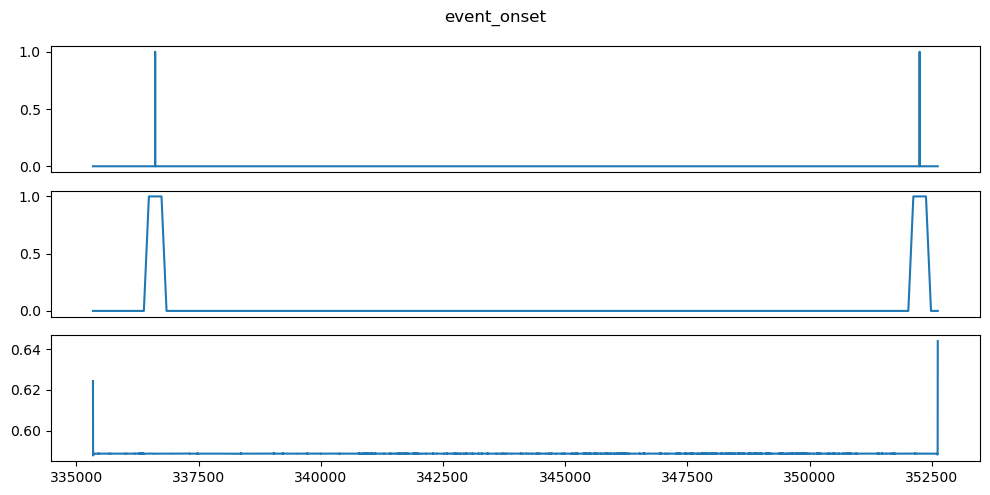

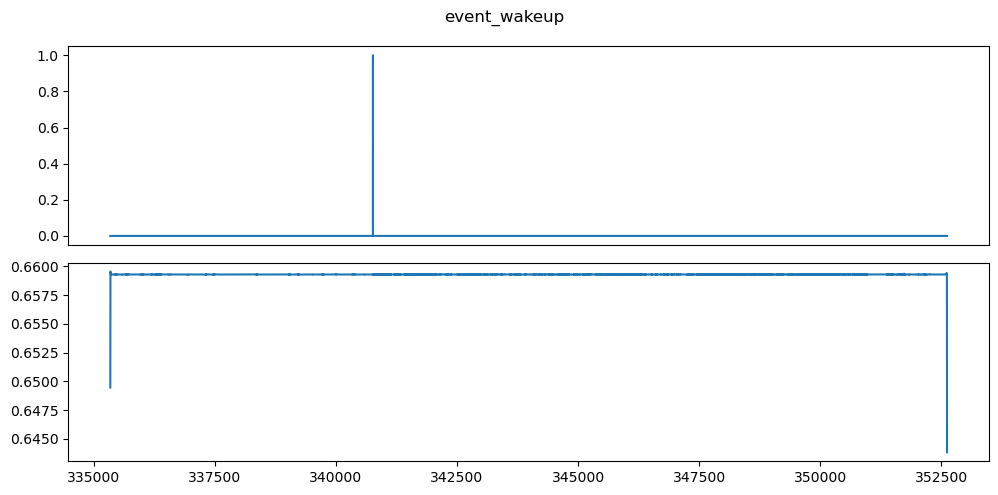

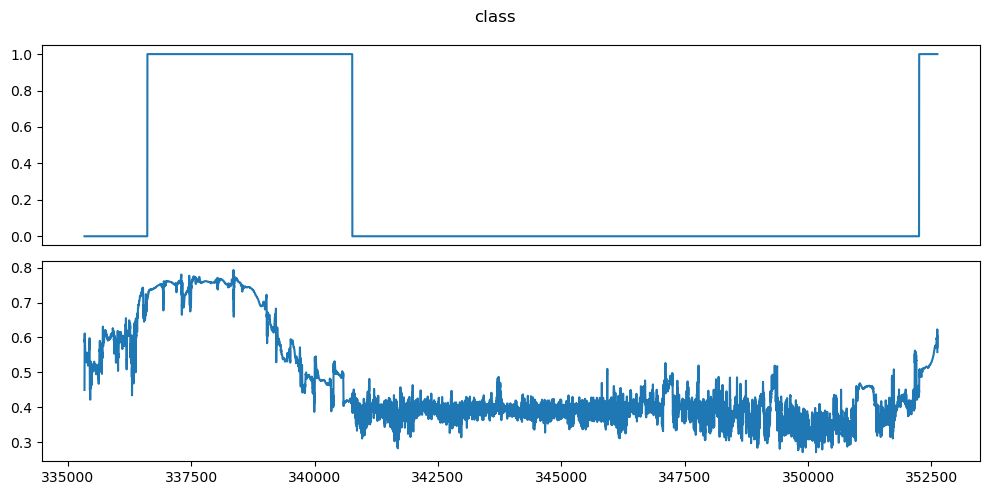

----------------------------------


In [12]:
random_series_date_key = np.random.choice(oof_df["series_date_key"].unique(), 1, replace=False)
print(random_series_date_key)
for key in random_series_date_key:
    print(key)
    df = oof_df[oof_df["series_date_key"]==key]
    plot_inputs(df)
    plot_event_onset(df)
    plot_event_wakeup(df)
    plot_event_sleep(df)
    print("----------------------------------")